In [1]:
#solution_dsci_chapter_03_plotting.ipynb
import pandas as pd
from numpy import nan
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
%matplotlib inline

if '__file__' in dir():
    path, _=os.path.split(__file__)  
else: path=os.getcwd() 

#http://www.rotowire.com/baseball/player_ex_stats.htm
fn=os.path.join(path, "baseball_stats.xls")
df=pd.read_excel(fn)

In [2]:
df.columns

Index(['name', 'team', 'pos', 'games', 'at_bat', 'pitches', 'bunts', 'gnd_dp',
       'intl_walk', 'bb', 'k', 'bb_pct', 'bb_per_K', 'cont_pct', 'sbo_pct',
       'avg', 'avg_balls_in_play'],
      dtype='object')

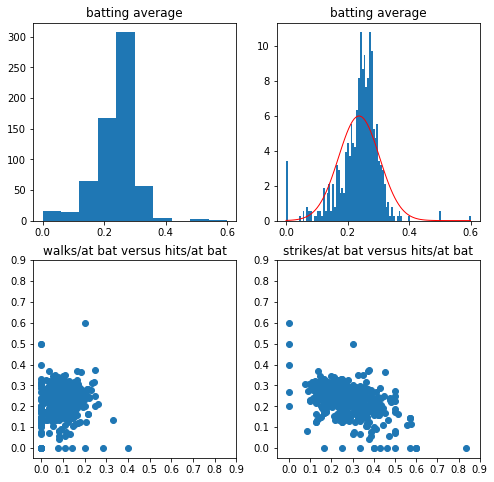

In [7]:
fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(8,8))
sub00, sub01 = ax[0]
sub10, sub11 = ax[1]

#sub00 is a histogram of the average
bat_avg=df['avg']
sub00.hist(bat_avg)
sub00.set_title('batting average')


#sub01 is an overlay of the average and a normal curve
#create a normal distribution w/ correct mean/std
mean=bat_avg.mean()
std=bat_avg.std()
N=bat_avg.count()

count, bins, ignored = sub01.hist(bat_avg, 100, normed=True)

#you can use optional settings for a line plot the first
#  argument is the probability density function
sub01.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mean)**2 / (2 * std**2)) ,
          
         linewidth=1, 
         color='r')

sub01.set_title('batting average')

#sub10 and sub11 are scatter plots; here's the data:
walks_per_at_bat=df['bb']/df['at_bat']
hits_per_at_bat = bat_avg
strikes_per_at_bat=df['k']/df['at_bat']

#figure out scatter tick marks - need to be same for both axes
min_tick= 0
max_tick= max(walks_per_at_bat.max(), hits_per_at_bat.max())+.2
this_tick=min_tick
ticks=[round(this_tick, 1)]
while True:
    this_tick+=.1
    ticks.append(this_tick)
    if this_tick>max_tick: break

#sub10 compares walks/at_at bat and hits/at_bat   
sub10.scatter(walks_per_at_bat, hits_per_at_bat)      
sub10.yaxis.set_ticks(ticks) 
sub10.xaxis.set_ticks(ticks)
sub10.set_title('walks/at bat versus hits/at bat')

#sub11 compares walks/at_at bat and hits/at_bat   
sub11.scatter(strikes_per_at_bat, hits_per_at_bat)      
sub11.yaxis.set_ticks(ticks) 
sub11.xaxis.set_ticks(ticks)
sub11.set_title('strikes/at bat versus hits/at bat')
#fig